# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- Employing the vehicles.csv database determine the main features that determine used-car sale price through ML regression modeling techniques
- Use the knowledge gained from these models to optimize the sales mix and sales strategy to maximize sales revenue
- Use the knowledge obtained from the modeling analyses to properly plan and manage the supply chain to ensure revenue-driving cars are offered to customers

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Import libraries and functions needed for the analysis

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, make_column_selector
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error 
from sklearn.feature_selection import SequentialFeatureSelector, RFE, RFECV
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import warnings

from sklearn import set_config
set_config(display="diagram") #setting this will display your pipelines as seen above


2. Read in the `vehicles.csv` file containing the analysis data

In [2]:
data = pd.read_csv('data/vehicles.csv')

3. Inspect data and get familiar with it and its values. Identify inconsistencies, missing values and outliers in the data set.

In [3]:
# General data inspection
# Do some visual perusing
data.head(40)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [4]:
# Getting familiar with column names. Identify target variable and useful columns/features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

From data.info() we identify 'price' as the target variable and notice there are two numerical features of interest, 'year' and 'odometer'. The other numerical column, 'id', referring the the car id number is not informative for modeling purposes.
Also inspection of the columns 'VIN', and 'title_status' reveal their contents are also not informative for modeling purposes.
The other features are categorical and likely to be important in predicting used car price like 'condition' and 'manufacturer' among others. 


Let's now inspect the values in the 'price' column:

In [5]:
#Insights into the column with target variable price
data['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Seems like there are some outliers in the data (extremely high car prices) probably due to data entry errors.
We will need to delete those rows


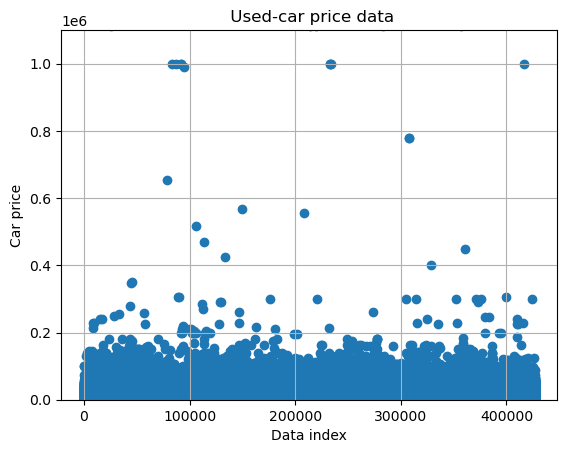

In [6]:
# Plot price data to visualize
plt.scatter(range(0,len(data.price)), data.price)
plt.ylim(0,1.1e6)
plt.ylabel('Car price')
plt.xlabel('Data index')
plt.title(' Used-car price data')
plt.grid()

For regular used car sales, car prices above 200 thousand dollars do not make sense. Will drop those rows from the data frame. Also cars with price <1000 are likely salvage cars and not regular offerings. 

From data.head() and data.info() we can see there are quite a number of columns with null entries.

Let's get additional insight into the number of missing or null values (NA, NaN) for those columns:

In [7]:
# Insights into number of missing or null values (NA, NaN)
data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

There is a significant number of mising/null values in several columns. Good news is that even in the worst case scenario if we discard all the rows with missing/null values we should have a sizeable amount of observations (> 80K) with which to carry out our analyses

To understand the data further let's get summaries of the entries for the different categorical variables:

In [8]:
#Check categorical variables
data['region'].value_counts().reset_index()

,region,count
0,columbus,3608
1,jacksonville,3562
2,spokane / coeur d'alene,2988
3,eugene,2985
4,fresno / madera,2983
...,...,...
399,meridian,28
400,southwest MS,14
401,kansas city,11
402,"fort smith, AR",9


In [9]:
data['manufacturer'].value_counts().reset_index()

,manufacturer,count
0,ford,70985
1,chevrolet,55064
2,toyota,34202
3,honda,21269
4,nissan,19067
5,jeep,19014
6,ram,18342
7,gmc,16785
8,bmw,14699
9,dodge,13707


In [10]:
data['model'].value_counts().reset_index()

,model,count
0,f-150,8009
1,silverado 1500,5140
2,1500,4211
3,camry,3135
4,silverado,3023
...,...,...
29644,plymouth fury 1,1
29645,f550 box truck delivery,1
29646,duramax 2500hd,1
29647,3 s sport,1


In [11]:
data['condition'].value_counts().reset_index()

,condition,count
0,good,121456
1,excellent,101467
2,like new,21178
3,fair,6769
4,new,1305
5,salvage,601


In [12]:
data['region'].value_counts().reset_index()

,region,count
0,columbus,3608
1,jacksonville,3562
2,spokane / coeur d'alene,2988
3,eugene,2985
4,fresno / madera,2983
...,...,...
399,meridian,28
400,southwest MS,14
401,kansas city,11
402,"fort smith, AR",9


In [13]:
data['state'].value_counts().reset_index().sort_values(by='state')

,state,count
34,ak,3474
28,al,4955
33,ar,4038
17,az,8679
0,ca,50614
11,co,11088
27,ct,5188
38,dc,2970
48,de,949
1,fl,28511


In [14]:
data['cylinders'].value_counts().reset_index()

,cylinders,count
0,6 cylinders,94169
1,4 cylinders,77642
2,8 cylinders,72062
3,5 cylinders,1712
4,10 cylinders,1455
5,other,1298
6,3 cylinders,655
7,12 cylinders,209


In [15]:
data['transmission'].value_counts().reset_index()

,transmission,count
0,automatic,336524
1,other,62682
2,manual,25118


In [16]:
data['fuel'].value_counts().reset_index()

,fuel,count
0,gas,356209
1,other,30728
2,diesel,30062
3,hybrid,5170
4,electric,1698


In [17]:
data['drive'].value_counts().reset_index()

,drive,count
0,4wd,131904
1,fwd,105517
2,rwd,58892


In [18]:
data['size'].value_counts().reset_index()

,size,count
0,full-size,63465
1,mid-size,34476
2,compact,19384
3,sub-compact,3194


In [19]:
data['type'].value_counts().reset_index()

,type,count
0,sedan,87056
1,SUV,77284
2,pickup,43510
3,truck,35279
4,other,22110
5,coupe,19204
6,hatchback,16598
7,wagon,10751
8,van,8548
9,convertible,7731


In [20]:
data['paint_color'].value_counts().reset_index()

,paint_color,count
0,white,79285
1,black,62861
2,silver,42970
3,blue,31223
4,red,30473
5,grey,24416
6,green,7343
7,custom,6700
8,brown,6593
9,yellow,2142


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [21]:
data.drop(['id','VIN','title_status','drive','cylinders','region','state'], axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   size          120519 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [22]:
# Remove rows with price outliers and with price < 1000 as these are likely salvage cars in really bad condition and not regular offerings
data.drop(data[data.price > 200e3].index, inplace=True)
data.drop(data[data.price < 1000].index, inplace=True)
data.describe()

,price,year,odometer
count,380441.000000,379276.000000,3.783620e+05
mean,19519.614855,2010.984080,9.815622e+04
std,14943.392483,9.589505,1.847533e+05
min,1000.000000,1900.000000,0.000000e+00
25%,7990.000000,2008.000000,3.820600e+04
50%,15990.000000,2013.000000,8.765350e+04
75%,27990.000000,2017.000000,1.360000e+05
max,200000.000000,2022.000000,1.000000e+07


In [23]:
# Drop rows with na entries 
data.dropna(inplace = True)
# Check results
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78577 entries, 31 to 426833
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         78577 non-null  int64  
 1   year          78577 non-null  float64
 2   manufacturer  78577 non-null  object 
 3   model         78577 non-null  object 
 4   condition     78577 non-null  object 
 5   fuel          78577 non-null  object 
 6   odometer      78577 non-null  float64
 7   transmission  78577 non-null  object 
 8   size          78577 non-null  object 
 9   type          78577 non-null  object 
 10  paint_color   78577 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.2+ MB


In [24]:
data.describe()

,price,year,odometer
count,78577.000000,78577.000000,7.857700e+04
mean,14003.053005,2008.248279,1.247467e+05
std,12410.032517,9.956248,2.083813e+05
min,1000.000000,1900.000000,0.000000e+00
25%,5700.000000,2005.000000,7.573400e+04
50%,9990.000000,2010.000000,1.162820e+05
75%,18000.000000,2014.000000,1.570000e+05
max,195000.000000,2022.000000,1.000000e+07


In [25]:
# For complexity management purposes will filter models to those with at least 300 cars sold
data = data[data.groupby("model")["model"].transform('size') >= 300]

In [26]:
data['model'].value_counts().reset_index()

,model,count
0,f-150,1704
1,silverado 1500,1376
2,1500,882
3,silverado,687
4,accord,663
5,camry,662
6,civic,612
7,2500,532
8,tacoma,520
9,altima,508


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15629 entries, 59 to 426769
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15629 non-null  int64  
 1   year          15629 non-null  float64
 2   manufacturer  15629 non-null  object 
 3   model         15629 non-null  object 
 4   condition     15629 non-null  object 
 5   fuel          15629 non-null  object 
 6   odometer      15629 non-null  float64
 7   transmission  15629 non-null  object 
 8   size          15629 non-null  object 
 9   type          15629 non-null  object 
 10  paint_color   15629 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.4+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [28]:
# Hot encode categorical features
df_enc = pd.get_dummies(data, drop_first=False)
df_enc.info()
df_enc.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15629 entries, 59 to 426769
Data columns (total 86 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   15629 non-null  int64  
 1   year                    15629 non-null  float64
 2   odometer                15629 non-null  float64
 3   manufacturer_chevrolet  15629 non-null  bool   
 4   manufacturer_chrysler   15629 non-null  bool   
 5   manufacturer_dodge      15629 non-null  bool   
 6   manufacturer_ford       15629 non-null  bool   
 7   manufacturer_gmc        15629 non-null  bool   
 8   manufacturer_honda      15629 non-null  bool   
 9   manufacturer_jeep       15629 non-null  bool   
 10  manufacturer_nissan     15629 non-null  bool   
 11  manufacturer_ram        15629 non-null  bool   
 12  manufacturer_toyota     15629 non-null  bool   
 13  model_1500              15629 non-null  bool   
 14  model_2500              15629 non-null  b

,price,year,odometer,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
59,14000,2012.0,95000.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
193,5900,1998.0,214000.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
224,2500,2008.0,204561.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
228,5500,1978.0,239000.0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
246,3500,1996.0,237000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Select predictor and observation/target variables
y = df_enc['price']
X = df_enc.drop(columns=['price'])

Text(0.5, 1.0, 'Histogram of transformed target data')

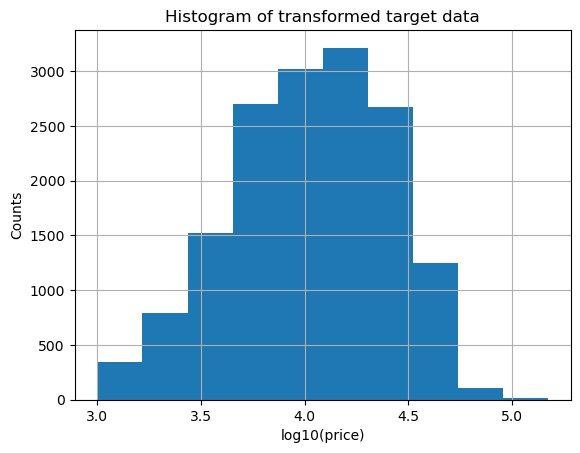

In [30]:
# Log Transform target variable y and plot histogram to check for normality
y_log = np.log10(y)
y_log.hist() #Much less skew that the untransformed variable y (df_enc['price'])
plt.xlabel('log10(price)')
plt.ylabel('Counts')
plt.title('Histogram of transformed target data')

Text(0.5, 1.0, 'Histogram of original target data')

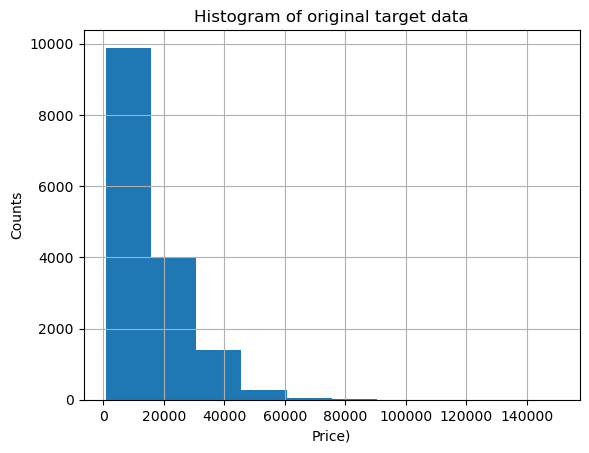

In [31]:
y.hist() #More less skew that the transformed variable log10(y)
plt.xlabel('Price)')
plt.ylabel('Counts')
plt.title('Histogram of original target data')


In [32]:
# Split data into training and test groups using 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.3, random_state= 42)
len(X_train), len(X_test)

(10940, 4689)

In [33]:
# Use sklearn to set up a pipe with standard scaler and ridge estimator
ridge_param_dict = {'ridge__alpha' : np.logspace(0,10,50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()),
                         ('ridge', Ridge())])
# Performed GridSearchCV to determine best value of alpha for Ridge regression
ridge_grid = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
# Best alpha = 68.66488450043002
best_alpha = ridge_grid.best_params_
# Compute ridge model predictions
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
# Compute train and test/development MSEs
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
# Print results
print(f'Ridge Train MSE: {ridge_train_mse}')
print(f'Ridge Test MSE: {ridge_test_mse}')
print(f'Best Alpha: {best_alpha}')
print(ridge_grid)
ridge_pipe

print(best_alpha.get('ridge__alpha'))


Ridge Train MSE: 0.04894733616912544
Ridge Test MSE: 0.05226825056460121
Best Alpha: {'ridge__alpha': 68.66488450043002}
GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e+02, 7.19685673e+02, 1.15...
       7.90604321e+04, 1.26485522e+05, 2.02358965e+05, 3.23745754e+05,
       5.17947468e+05, 8.28642773e+05, 1.32571137e+06, 2.12095089e+06,
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
      

In [34]:
#Obtain the values of the model coefficients by performing Ridge regression with best_alpha = 68.66488450043002
pipe = Pipeline([
    ('scl', StandardScaler()),
    ('ridge', Ridge(alpha=best_alpha.get('ridge__alpha')))
])
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
ridge_coefs = pipe.named_steps['ridge'].coef_
print('Ridge Coefficients:', ridge_coefs)
print(f'Ridge Train MSE with best Alpha: {train_mse}')
print(f'Ridge Test MSE with best Alpha: {test_mse}')

Ridge Coefficients: [ 0.16838558 -0.02886813  0.00632215  0.00062004 -0.00776105 -0.00581921
  0.04759558 -0.02251349  0.00830414 -0.01535591  0.00976654 -0.01155833
  0.00388919  0.02268784 -0.00616047 -0.01535591 -0.01515075 -0.01394852
 -0.01513781  0.07565086 -0.00839735 -0.02847337 -0.03516213 -0.02042302
  0.01992409  0.00310949 -0.03560037 -0.01621256 -0.01936062 -0.02063155
 -0.01860869  0.03104175 -0.01632753 -0.01830184 -0.01369299 -0.0049907
  0.00855826  0.02542161  0.02377472  0.02494677  0.0011614   0.02778911
  0.0325948  -0.06430035 -0.02409603  0.0300361   0.00872954 -0.02094393
  0.02599959 -0.0016106  -0.01704814 -0.00849654 -0.00564878 -0.00353014
  0.00181781  0.00463821 -0.00171992  0.00274457  0.00087342 -0.01116518
  0.01734854 -0.00352279  0.00444501 -0.00519237 -0.00957456 -0.01191478
  0.00098392 -0.00635087  0.00377552 -0.05160892  0.03772492  0.00856089
  0.00214893  0.00490264 -0.00437494 -0.00806008  0.00712483 -0.00630796
  0.00321725  0.00826979 -0.0032

In [35]:
# Inspect ridge coefficients to find main features affecting price
ridge_coeff_df = pd.DataFrame([ridge_coefs.T], columns = X.columns, index = ['Ridge Model coeff'])
ridge_coeff_df.T.abs().sort_values(by='Ridge Model coeff', ascending=False).head(50)

,Ridge Model coeff
year,0.168386
model_corvette,0.075651
condition_fair,0.064300
type_sedan,0.051609
manufacturer_gmc,0.047596
type_truck,0.037725
model_focus,0.035600
model_escape,0.035162
condition_excellent,0.032595
model_mustang,0.031042


Inspection of Ridge coefficents reveals manual thresholding is difficult. Let's do a permutation importance analysis to gain more insight

In [36]:
# Permutation importance
print('Model reference score = ',pipe.score(X_test, y_test))

r = permutation_importance(pipe, X_test, y_test, 
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
       print(f" {X.columns[i]:<8}"
             f" {r.importances_mean[i]:.3f}"
             f"  +/- {r.importances_std[i]:.3f}")

Model reference score =  0.6426519451064572
 year     0.391  +/- 0.009
 model_corvette 0.092  +/- 0.004
 condition_fair 0.056  +/- 0.003
 type_sedan 0.038  +/- 0.002
 manufacturer_gmc 0.031  +/- 0.002
 type_truck 0.022  +/- 0.002
 model_escape 0.019  +/- 0.001
 model_focus 0.014  +/- 0.001
 condition_excellent 0.014  +/- 0.001
 model_mustang 0.013  +/- 0.002
 condition_like new 0.013  +/- 0.001
 odometer 0.011  +/- 0.001
 model_tacoma 0.011  +/- 0.001
 fuel_diesel 0.010  +/- 0.001
 model_wrangler 0.010  +/- 0.001
 model_equinox 0.010  +/- 0.001
 condition_good 0.009  +/- 0.001
 model_silverado 1500 0.008  +/- 0.001
 model_silverado 2500hd 0.008  +/- 0.001
 model_2500 0.008  +/- 0.001
 manufacturer_honda 0.007  +/- 0.001
 model_grand cherokee 0.007  +/- 0.001
 model_impala 0.007  +/- 0.001
 model_explorer 0.007  +/- 0.001
 model_f-150 0.006  +/- 0.001
 condition_salvage 0.005  +/- 0.001
 manufacturer_nissan 0.004  +/- 0.001
 model_altima 0.004  +/- 0.001
 fuel_gas 0.004  +/- 0.001
 mode

Ridge results seem difficult to interpret even after permutation importance analysis. Need to use a better selection method

Will concentrate on using RFE and STS instead for the final analyses as they are more robust model selection approaches:

In [37]:
# To improve analysis created RFE estimator using LinearRegression for selecting model features
# Repeated analysis for different values of number_features using GridSearchCV

# Create pipe for RFE with LR. Include Standard scaling and LinearRegression estimator for finding model coefficients
rfe_number_features = 50
#rfe_pipe = Pipeline([('scaler', StandardScaler()),
#                     ('selector', RFE(LinearRegression())),
#                     ('model', LinearRegression())])
rfe_pipe = Pipeline([('selector', RFE(LinearRegression())),
                     ('model', LinearRegression())])
# number_features features to be selected
param_dict = {'selector__n_features_to_select' : [rfe_number_features]}
# Run GridSearchCV for finding the best model features to select
rfe_selector_grid = GridSearchCV(estimator=rfe_pipe, param_grid=param_dict)
#Fit model
rfe_selector_grid.fit(X_train, y_train)
# Compute model predictions for Train and Test data groups 
rfe_train_preds = rfe_selector_grid.predict(X_train)
rfe_test_preds = rfe_selector_grid.predict(X_test)
# Compute train and test MSEs
rfe_train_mse = mean_squared_error(y_train, rfe_train_preds)
rfe_test_mse = mean_squared_error(y_test, rfe_test_preds)

# Retrieve best estimator
rfe_best_estimator = rfe_selector_grid.best_estimator_
# Retrieve best selector
rfe_best_selector = rfe_best_estimator.named_steps['selector']
# Retrieve best model
rfe_best_model = rfe_best_estimator.named_steps['model']
# Retrieve features selected by selector
rfe_feature_names = X_train.columns[rfe_best_selector.get_support()]
# Retrieve model coefficients
rfe_coefs = rfe_best_model.coef_
# Place coefficients in data frame for easy display
coeff_df=pd.DataFrame([rfe_coefs.T], columns = rfe_feature_names, index = ['RFE selection with LR - Model coeff'])

# Print results
print(f'RFE Train MSE: {rfe_train_mse}')
print(f'RFE Test MSE: {rfe_test_mse}')
print('RFE Best estimator = ',rfe_best_estimator)
print('RFE Best selector = ',rfe_best_selector)
print('RFE Best model = ', rfe_best_model)
print(f'Features from RFE best selector: {rfe_feature_names}.')
print(f'Number of features from RFE best selector: {rfe_best_selector.n_features_}')   
coeff_df.T.sort_values(by='RFE selection with LR - Model coeff', ascending=False).head(60)


RFE Train MSE: 0.07183508002246337
RFE Test MSE: 0.07455012121800622
RFE Best estimator =  Pipeline(steps=[('selector',
                 RFE(estimator=LinearRegression(), n_features_to_select=50)),
                ('model', LinearRegression())])
RFE Best selector =  RFE(estimator=LinearRegression(), n_features_to_select=50)
RFE Best model =  LinearRegression()
Features from RFE best selector: Index(['manufacturer_chevrolet', 'manufacturer_dodge', 'manufacturer_ford',
       'manufacturer_honda', 'manufacturer_nissan', 'manufacturer_toyota',
       'model_2500', 'model_altima', 'model_camry', 'model_corolla',
       'model_corvette', 'model_equinox', 'model_escape', 'model_explorer',
       'model_f-150', 'model_f150', 'model_focus', 'model_grand cherokee',
       'model_impala', 'model_malibu', 'model_mustang', 'model_prius',
       'model_sierra 1500', 'model_sierra 2500hd', 'model_silverado 1500',
       'model_silverado 2500hd', 'model_tacoma', 'model_wrangler',
       'condition_ex

,RFE selection with LR - Model coeff
model_altima,6.151536e+11
model_tacoma,5.246628e+11
model_prius,5.246628e+11
model_corolla,5.246628e+11
model_camry,5.246628e+11
model_mustang,9.968553e+10
model_f-150,9.968553e+10
model_f150,9.968553e+10
model_explorer,9.968553e+10
model_escape,9.968553e+10


Perform KFold crossvalidation (K=5):

In [38]:
#rfe_pipe = Pipeline([('scaler', StandardScaler()),
#                     ('selector', RFE(LinearRegression(), n_features_to_select=rfe_number_features)),
#                     ('model', LinearRegression())])
rfe_pipe = Pipeline([('selector', RFE(LinearRegression(), n_features_to_select=rfe_number_features)),
                     ('model', LinearRegression())])
scores_mae = (-1)*cross_val_score(rfe_pipe, X, y_log, scoring='neg_mean_absolute_error', cv=5, error_score='raise')
scores_mse = (-1)*cross_val_score(rfe_pipe, X, y_log, scoring='neg_mean_squared_error', cv=5, error_score='raise')
# MAE/RMSE
print('RFE KFold=5 crossvalidation results')
print('-----------------------------------')
print('RFE MAE: %.7e (std = %.3e)' % (np.mean(scores_mae), np.std(scores_mae)))
print('RFE RMSE: %.7e (std = %.3e)' % (np.mean(np.sqrt(scores_mse)), np.std(np.sqrt(scores_mse))))

RFE KFold=5 crossvalidation results
-----------------------------------
RFE MAE: 5.8343570e+07 (std = 1.167e+08)
RFE RMSE: 3.2620265e+09 (std = 6.524e+09)


Also look at STS to see what features are selected by this model selector:

In [39]:
# Create pipe for Sequential Feature Selection with Lasso. Include LinearRegression estimator for finding model coefficients
#selector_pipe = Pipeline([('scaler', StandardScaler()),
#                          ('selector', SequentialFeatureSelector(Lasso())),
#                          ('model', LinearRegression())])
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(Lasso())),
                          ('model', LinearRegression())])
# Features to be selected with STS
sts_number_features = 50
param_dict = {'selector__n_features_to_select' : [sts_number_features]}
# Run GridSearchCV for finding the best model features to select
selector_grid = GridSearchCV(estimator=selector_pipe, param_grid=param_dict)
#Fit model
selector_grid.fit(X_train, y_train)
# Compute model predictions for Train and Test data groups 
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
# Compute train and test MSEs
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

# Retrieve best estimator
best_estimator = selector_grid.best_estimator_
# Retrieve best selector
best_selector = best_estimator.named_steps['selector']
# Retrieve best model
best_model = best_estimator.named_steps['model']
# Retrieve features selected by selector
feature_names = X_train.columns[best_selector.get_support()]
# Retrieve model coefficients
sts_coefs = best_model.coef_
# Place coefficients in data frame for easy display
sts_coeff_df=pd.DataFrame([sts_coefs.T], columns = feature_names, index = ['Sequential Feature selection with Lasso - Model coeff'])

# Print results
print(f'STS Train MSE: {selector_train_mse}')
print(f'STS Test MSE: {selector_test_mse}')
print('Best estimator = ',best_estimator)
print('Best selector = ',best_selector)
print('Best model = ', best_model)
print(f'Features from best selector: {feature_names}.')
sts_coeff_df.T.sort_values(by='Sequential Feature selection with Lasso - Model coeff', ascending=False).head(60)


STS Train MSE: 0.05060065778034309
STS Test MSE: 0.05419051331531377
Best estimator =  Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=50)),
                ('model', LinearRegression())])
Best selector =  SequentialFeatureSelector(estimator=Lasso(), n_features_to_select=50)
Best model =  LinearRegression()
Features from best selector: Index(['year', 'odometer', 'manufacturer_chevrolet', 'manufacturer_chrysler',
       'manufacturer_dodge', 'manufacturer_ford', 'manufacturer_gmc',
       'manufacturer_honda', 'manufacturer_jeep', 'manufacturer_nissan',
       'manufacturer_ram', 'manufacturer_toyota', 'model_1500', 'model_2500',
       'model_accord', 'model_altima', 'model_camry', 'model_civic',
       'model_corolla', 'model_corvette', 'model_cr-v', 'model_equinox',
       'model_escape', 'model_explorer', 'model_f-150', 'model_f150',
       'model_focus', 'model_grand caravan',

,Sequential Feature selection with Lasso - Model coeff
model_corvette,5.302492e-01
manufacturer_gmc,3.231726e-01
model_tacoma,2.756038e-01
model_silverado 2500hd,2.241070e-01
model_mustang,1.982997e-01
condition_new,1.953827e-01
model_wrangler,1.833373e-01
condition_like new,1.818461e-01
fuel_diesel,1.791111e-01
model_2500,1.764430e-01


Perform KFold (K=5) crossvalidation:

In [40]:
#selector_pipe = Pipeline([('scaler', StandardScaler()),
#                          ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=sts_number_features)),
#                          ('model', LinearRegression())])
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=sts_number_features)),
                          ('model', LinearRegression())])
scores_mae = (-1)*cross_val_score(selector_pipe, X, y_log, scoring='neg_mean_absolute_error', cv=5, error_score='raise')
scores_mse = (-1)*cross_val_score(selector_pipe, X, y_log, scoring='neg_mean_squared_error', cv=5, error_score='raise')
# MAE/RMSE
print('STS KFold=5 crossvalidation results')
print('-----------------------------------')
print('STS MAE: %.7e (std = %.3e)' % (np.mean(scores_mae), np.std(scores_mae)))
print('STS RMSE: %.7e (std = %.3e)' % (np.mean(np.sqrt(scores_mse)), np.std(np.sqrt(scores_mse))))

STS KFold=5 crossvalidation results
-----------------------------------
STS MAE: 1.6245975e-01 (std = 2.153e-03)
STS RMSE: 2.7931854e-01 (std = 9.088e-02)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summary of findings for different number of features selected using RFE and STS
A battery of model selection analyses ranging from 10 to 50 selected features were conducted. 

Limited the maximum number of features selected in the analyses due to computing power and simulation time limitations. 

Numeric results including model score metrics and identified features with their coefficients are shown below.

## Finding highlights
1. For simple model validation (training/test data groups), traning and test MSE values decreased for both RFE and STS methods as the number of selected features increased
2. For KFold validation with K=5, RFE exibited lower RMSE than STS in the 10-40 selected feature range
3. For KFold validation with K=5, STS exhibited lower MAE than RFE in the 10-40 selected feature range
4. RFE failed to reliably select 50 features: KFold cross-validation MAE and RSME values were exceedingly high
5. STS was able to reliably select 50 features: Kfold cross-validation MAE and RSME values followed the observed decreasing trend as a function of number of features selected
6. Both STS and RFE results can be jointly used for price predictions up to 40 selected features.
7. 40 features analysis results will be the baseline for our discussion in the Deployment section



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Objectives

1. Provide guidance on the main features that determine used-car sale price
2. Provide guidance on optimal sales mix and sales strategy to maximize sales revenue
3. Provide guidance on associated supply chain planning and management aspects

#### Analysis Methodology

1. Used-car attribute data contained in a public database (vehicles.csv) was analyzed using ML modeling (regression) techniques to gain insight into drivers of used-car price
2. Robust model feature selection methods (recursive feature elimination and sequential feature selection) were applied to the data to rank the most important features influencing used-car price
3. The maximum number of features used for developing prediction insights was chosen to be 40 features due to computation power and simulation time limitations


#### Analysis results - Most desirable car makers to offer to maximize revenue

Ranked from most to least desireable
1. Nissan	
2. GMC	
3. Jeep	
4. RAM	
5. Chevrolet	
6. Chrysler	
7. Ford	
8. Toyota	
9. Dodge	
10. Honda





#### Analysis results - Other factors

1. Not surprisingly manufacturing year, number of miles (odometer reading) and car condition significantly drive price
2. Vans can carry a premium compared to SUV and Trucks, the other two types of cars with significant price influence
3. Brown and Green colored vehicles are susceptible to discounts
4. 

#### General Guidance
1. Based on these results, it is advised that the top ten models listed above be considered to lead the sales mix
2. Efforts to optimize the supply chain with appropriate lead times and conditions need to be ensured with the corresponding manufacturers